<a href="https://colab.research.google.com/github/nathankim7/colab-notebooks/blob/master/CSC321tut3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
import math
from autograd import grad, grad_named
%matplotlib inline

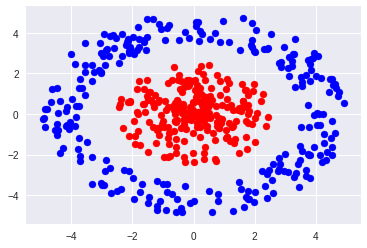

In [0]:
np.random.seed(0)
num_data = 500

def make_dataset(num_pts):
  radius = 5
  data = []
  labels = []
  
  # positive examples
  for i in range(num_pts // 2):
    r = np.random.uniform(0, radius * 0.5)
    angle = np.random.uniform(0, 2 * math.pi)
    y = r * math.sin(angle)
    x = r * math.cos(angle)
    data.append([x, y])
    labels.append(1)
    
  # negative examples
  for i in range(num_pts // 2):
    r = np.random.uniform(radius*0.7, radius)
    angle = np.random.uniform(0, 2*math.pi)
    y = r * math.sin(angle)
    x = r * math.cos(angle)
    data.append([x, y])
    labels.append(0)
    
  data = np.asarray(data)
  labels = np.asarray(labels)
  return data, labels

data, labels = make_dataset(500)

plt.scatter(data[:num_data//2, 0], data[:num_data//2, 1], color='red') 
plt.scatter(data[num_data//2:, 0], data[num_data//2:, 1], color='blue')     

In [0]:
params = {}
params['U'] = np.random.randn(3, 2)
params['b'] = np.zeros(3)
params['W'] = np.random.randn(3)
params['c'] = 0

def forward(X, params):    
    G = np.dot(X, params['U'].T)  + params['b']
    H = np.tanh(G)
    z = np.dot(H, params['W'].T) + params['c']
    y = sigmoid(z)
    
    return y

In [0]:
def backprop(X, t, params):
  N = X.shape[0]
  
  G = np.dot(X, params['U'].T) + params['b']
  H = np.tanh(G)
  z = np.dot(H, params['W'].T) + params['c']
  y = sigmoid(z)
  loss = (1.0 / N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
  
  E_bar = 1
  z_bar = (1.0 / N) * (y - t)
  W_bar = np.dot(H.T, z_bar)
  c_bar = np.sum(z_bar)
  H_bar = np.outer(z_bar, params['W'].T)
  G_bar = H_bar * (1 - np.tanh(G) ** 2)
  U_bar = np.dot(G_bar.T, X)
  b_bar = np.dot(G_bar.T, np.ones(N))

  grads = {}
  grads['U'] = U_bar
  grads['b'] = b_bar
  grads['W'] = W_bar
  grads['c'] = c_bar
  
  return grads, loss

In [0]:
def solve_grad(X, t, params, niter = 10000, alpha = 1):
  for i in range(niter):
    grads, loss = backprop(X, t, params)

    for k in params:
      params[k] -= alpha * grads[k]
    
solve_grad(data, labels, params)

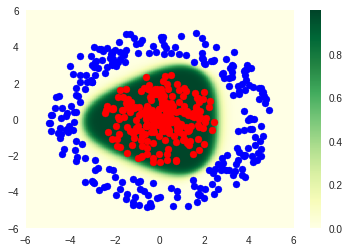

In [0]:
# ultimately you end up with a lattice of num_points x num_points evenly spaced in the range (-6, -6) to (6, 6)
num_points = 400
x1s = np.linspace(-6.0, 6.0, num_points)
x2s = np.linspace(-6.0, 6.0, num_points)
points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
Y = forward(points, params).reshape(num_points, num_points) # vector of classified lattice points
X1, X2 = np.meshgrid(x1s, x2s) 

plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(data[:num_data//2, 0], data[:num_data//2, 1], color='red') 
plt.scatter(data[num_data//2:, 0], data[num_data//2:, 1], color='blue') 